In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Load data. Check cols

In [2]:
before = pd.read_csv('before.csv')
new = pd.read_csv('new.csv')

before.drop("filename", axis=1, inplace=True)
new.drop("filename", axis=1, inplace=True)

# same column and diff columns
same_columns = before.columns.intersection(new.columns)
new_diff_before = new.columns.difference(before.columns)
before_diff_new = before.columns.difference(new.columns)

print('Same columns:', same_columns)
print('New diff before:', new_diff_before)
print('Before diff new:', before_diff_new)

# rerange columns to be the same
before = before[same_columns.sort_values()]
new = new[same_columns.sort_values()]
print('Before col == new col:', before.columns.equals(new.columns))

target_cols = ['score_AI', 'score_alone','score_overreliance']

tasksheet_cols = before.columns[before.columns.str.contains('tasksheet')]
gpt_cols = before.columns[before.columns.str.contains('gpt')]

new.drop(['total_working_time'], axis=1, inplace=True)
before.drop(['total_working_time'], axis=1, inplace=True)

Same columns: Index(['average_copy_length_gpt', 'average_highlight_length_gpt',
       'average_mousewheel_distance_gpt', 'average_paste_length_gpt',
       'average_prompt_duration_gpt', 'click_count_gpt', 'copy_count_gpt',
       'delete_count_gpt', 'highlight_count_gpt', 'idle_count_gpt',
       'keypress_count_gpt', 'med_copy_length_gpt', 'med_highlight_length_gpt',
       'med_idle_duration_gpt', 'med_mousewheel_distance_gpt',
       'med_paste_length_gpt', 'med_prompt_duration_gpt',
       'mousewheel_count_gpt', 'paste_count_gpt', 'total_idle_duration_gpt',
       'total_mouse_movement_gpt', 'total_mousewheel_distance_gpt',
       'totaltime_gpt', 'windowswitch_count_gpt', 'windowswitch_speed_gpt',
       'average_copy_length_tasksheet', 'average_highlight_length_tasksheet',
       'average_mousewheel_distance_tasksheet',
       'average_paste_length_tasksheet', 'click_count_tasksheet',
       'copy_count_tasksheet', 'delete_count_tasksheet',
       'highlight_count_tasksheet', 

In [3]:
# cols that begin with 'med'
# med_cols = before.columns[before.columns.str.contains('average')]
# before.drop(med_cols, axis=1, inplace=True)
# new.drop(med_cols, axis=1, inplace=True)
# total_cols = before.columns[before.columns.str.contains('total')]
# before.drop(total_cols, axis=1, inplace=True)
# new.drop(total_cols, axis=1, inplace=True)

In [4]:
def plot_corr(df, feature_cols, target_col, title):
    # heatmap 
    plt.figure(figsize=(5, 10))
    corr = pd.merge(df[feature_cols], df[target_col], left_index=True, right_index=True).corr()[target_col].sort_values(ascending=False).to_frame()
    sns.heatmap(corr, cmap='coolwarm', annot=True)
    plt.title(title)

## T test bewteen the two groups

In [5]:
from scipy.stats import ttest_ind, levene
for col in before.columns:
    p_ = levene(before[col], new[col]).pvalue
    eq_var = p_ > 0.05
    t, p = ttest_ind(before[col], new[col], equal_var=eq_var, permutations=1000, random_state=0)
    same_dist = p > 0.05
    if not same_dist:
        print(f'{col}: {same_dist}, p = {round(p,4)}, levene p = {round(p_,4)}')

average_mousewheel_distance_tasksheet: False, p = 0.008, levene p = 0.0001
delete_count_gpt: False, p = 0.003, levene p = 0.0
keypress_count_gpt: False, p = 0.004, levene p = 0.0
med_mousewheel_distance_gpt: False, p = 0.05, levene p = 0.011
med_mousewheel_distance_tasksheet: False, p = 0.005, levene p = 0.0
mousewheel_count_gpt: False, p = 0.001, levene p = 0.0003
mousewheel_count_tasksheet: False, p = 0.011, levene p = 0.0017
paste_count_gpt: False, p = 0.036, levene p = 0.8556
paste_count_tasksheet: False, p = 0.01, levene p = 0.0006
score_AI: False, p = 0.001, levene p = 0.2969
score_overreliance: False, p = 0.048, levene p = 0.5371
total_mousewheel_distance_gpt: False, p = 0.017, levene p = 0.0107
totaltime_tasksheet: False, p = 0.041, levene p = 0.4304
windowswitch_count_gpt: False, p = 0.007, levene p = 0.4433
windowswitch_speed_gpt: False, p = 0.018, levene p = 0.0985


## Raw data hist

In [6]:
# plt.figure(figsize=(35,35))
# for i, col in enumerate(before.columns):
#     plt.subplot(6,9,i+1)
#     sns.histplot(new[col], color='b', label='new', alpha=0.5, bins=10)
#     sns.histplot(before[col], color='r', label='before', alpha=0.5, bins=10)
#     plt.legend()

In [7]:
def df_corr(df, threshold):
    corr = df.corr()
    drop_cols = []
    for i in range(len(corr.columns)):
        for j in range(i):
            if corr.columns[i] in target_cols or corr.columns[j] in target_cols:
                continue
            if abs(corr.iloc[i, j]) > threshold:
                x = corr.columns[i]
                y = corr.columns[j]
                print(f'Correlated features: {x}, {y}: {round(corr.iloc[i, j],4)}')
                drop_cols.append(x)
    return drop_cols

In [8]:
print('Before:')
drop_cols_before = df_corr(before, 0.95)
print('New:')
drop_cols_new = df_corr(new, 0.95)

Before:
Correlated features: med_mousewheel_distance_tasksheet, average_mousewheel_distance_tasksheet: 0.9769
Correlated features: med_paste_length_gpt, average_paste_length_gpt: 0.957
Correlated features: med_paste_length_tasksheet, average_paste_length_tasksheet: 0.9939
Correlated features: total_idle_duration_gpt, idle_count_gpt: 0.9955
Correlated features: total_idle_duration_tasksheet, idle_count_tasksheet: 0.9945
Correlated features: total_mouse_movement_tasksheet, click_count_tasksheet: 0.9669
New:
Correlated features: average_highlight_length_tasksheet, average_copy_length_tasksheet: 0.9509
Correlated features: highlight_count_gpt, copy_count_gpt: 0.9748
Correlated features: med_copy_length_gpt, average_copy_length_gpt: 0.9901
Correlated features: med_copy_length_tasksheet, average_copy_length_tasksheet: 0.9868
Correlated features: med_copy_length_tasksheet, average_highlight_length_tasksheet: 0.9543
Correlated features: med_highlight_length_tasksheet, average_highlight_length_

In [9]:
drop_cols_new = [col for col in drop_cols_new if col.startswith('med') or col.startswith('total')]
drop_cols_before = [col for col in drop_cols_before if col.startswith('med') or col.startswith('total')]
new.drop(drop_cols_new, axis=1, inplace=True)
before.drop(drop_cols_before, axis=1, inplace=True)

In [10]:
print('Before:')
drop_cols_before = df_corr(before, 0.95)
print('New:')
drop_cols_new = df_corr(new, 0.95)

Before:
New:
Correlated features: average_highlight_length_tasksheet, average_copy_length_tasksheet: 0.9509
Correlated features: highlight_count_gpt, copy_count_gpt: 0.9748


In [11]:
# calculate the feature matrix's condition number
from numpy.linalg import cond
cond_before = cond(before.drop(target_cols, axis=1))
cond_new = cond(new.drop(target_cols, axis=1))
print(f'Condition number before: {cond_before}')
print(f'Condition number new: {cond_new}')

Condition number before: 3.2494127134331233e+18
Condition number new: 334512.8150946048


## Data after box-cox hist

In [12]:
from scipy.stats import boxcox

In [13]:
norm_before = before.copy()
norm_new = new.copy()
for col in new.columns:
    if col in target_cols:
        continue
    if abs(new[col].skew()) > 1:
        print(col)
        norm_new[col] = boxcox(new[col]+1)[0]
    else:
        norm_new[col] = new[col]

print('Before:')

for col in before.columns:
    if col in target_cols:
        continue
    if abs(before[col].skew()) > 1:
        print(col)
        norm_before[col] = boxcox(before[col]+1)[0]
    else:
        norm_before[col] = before[col]

# plt.figure(figsize=(35,35))
# for i, col in enumerate(before.columns):
#     plt.subplot(6,9,i+1)
#     sns.histplot(norm_new[col], color='b', label='new', alpha=0.5, bins=10)
#     sns.histplot(norm_before[col], color='r', label='before', alpha=0.5, bins=10)

#     # mark all the columns that are performed boxcox
#     mark = '*' if abs(before[col].skew()) > 1 else ''
#     plt.title(col+mark)
#     plt.legend()

average_copy_length_gpt
average_copy_length_tasksheet
average_highlight_length_gpt
average_highlight_length_tasksheet
average_mousewheel_distance_gpt
average_mousewheel_distance_tasksheet
average_paste_length_gpt
average_paste_length_tasksheet
average_prompt_duration_gpt
click_count_tasksheet
copy_count_tasksheet
delete_count_gpt
delete_count_tasksheet
highlight_count_tasksheet
idle_count_tasksheet
keypress_count_gpt
keypress_count_tasksheet
med_highlight_length_gpt
med_idle_duration_gpt
med_idle_duration_tasksheet
med_paste_length_gpt
med_prompt_duration_gpt
mousewheel_count_gpt
mousewheel_count_tasksheet
total_mouse_movement_gpt
total_mouse_movement_tasksheet
windowswitch_speed_gpt
Before:
average_copy_length_gpt
average_copy_length_tasksheet
average_highlight_length_gpt
average_highlight_length_tasksheet
average_paste_length_tasksheet
average_prompt_duration_gpt
copy_count_gpt
delete_count_gpt
delete_count_tasksheet
highlight_count_gpt
keypress_count_tasksheet
med_copy_length_gpt
me

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Try to do some linear regression

In [15]:
def qq_plot(df, col):
    plt.figure()
    from scipy import stats
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)
    plt.show()

def box_cox(df, col):
    from scipy import stats
    lambda_, fitted = stats.boxcox(df[col] + df[col].min() + 1)
    df[col] = stats.boxcox(df[col], lmbda=lambda_)
    return df

In [16]:
import statsmodels.api as sm
def fit_with_sm(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

def fit_with_sklearn(X, y):
    from sklearn.linear_model import LinearRegression
    model = LinearRegression().fit(X, y)
    return model

def fit_with_catboost(X, y):
    from catboost import CatBoostRegressor
    model = CatBoostRegressor(depth=3, num_trees=500, verbose=False).fit(X, y)
    return model

### Fit raw data

In [17]:
def fit_pipeline(df, scaler=None):
    if scaler is not None:
        df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    model = fit_with_sm(df.drop((['score_AI', 'score_alone','score_overreliance']), axis=1), df['score_overreliance'])
    print(model.pvalues[model.pvalues < 0.05])
    return model

In [18]:
model = fit_pipeline(before, None)

const                                  0.034769
average_mousewheel_distance_gpt        0.031601
click_count_gpt                        0.043442
click_count_tasksheet                  0.039580
copy_count_gpt                         0.031123
copy_count_tasksheet                   0.036852
delete_count_tasksheet                 0.028653
highlight_count_gpt                    0.039544
highlight_count_tasksheet              0.040002
idle_count_gpt                         0.035660
idle_count_tasksheet                   0.027796
keypress_count_gpt                     0.035670
med_highlight_length_tasksheet         0.043925
med_prompt_duration_gpt                0.029103
mousewheel_count_gpt                   0.032498
paste_count_gpt                        0.034906
total_mousewheel_distance_gpt          0.036163
total_mousewheel_distance_tasksheet    0.029632
totaltime_gpt                          0.047440
windowswitch_count_gpt                 0.049932
windowswitch_speed_gpt                 0

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     score_overreliance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     59.02
Date:                Mon, 26 Aug 2024   Prob (F-statistic):              0.102
Time:                        14:29:41   Log-Likelihood:                -20.089
No. Observations:                  22   AIC:                             82.18
Df Residuals:                       1   BIC:                             105.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0002   8.46e-06    -18.292      0.035      -0.000   -4.72e-05
average_copy_length_gpt                  -0.0350      0.010     -3.366      0.184      -0.167       0.097
average_copy_length_tasksheet             0.0234      0.010      2.459      0.246      -0.098       0.145
average_highlight_length_gpt              0.2367      0.021     11.438      0.056      -0.026       0.500
average_highlight_length_tasksheet        0.0061      0.010      0.592      0.660      -0.124       0.136
average_mousewheel_distance_gpt           0.2155      0.011     20.129      0.032       0.079       0.351
average_mousewheel_distance_tasksheet     0.0098      0.007      1.377      0.400      -0.081       0.100
average_paste_length_gpt                 -0.0081      0.003     -2.921      0.210      -0.043       0.027
average_paste_length_tasksheet            0.0824      0.007     12.462      0.051      -0.002       0.166
average_prompt_duration_gpt               0.1351      0.013     10.597      0.060      -0.027       0.297
click_count_gpt                          -0.1513      0.010    -14.632      0.043      -0.283      -0.020
click_count_tasksheet                    -0.2658      0.017    -16.064      0.040      -0.476      -0.056
copy_count_gpt                           -0.1239      0.006    -20.439      0.031      -0.201      -0.047
copy_count_tasksheet                     -0.0421      0.002    -17.256      0.037      -0.073      -0.011
delete_count_gpt                         -0.0730      0.010     -7.047      0.090      -0.205       0.059
delete_count_tasksheet                   -0.1894      0.009    -22.203      0.029      -0.298      -0.081
highlight_count_gpt                      -0.0919      0.006    -16.078      0.040      -0.165      -0.019
highlight_count_tasksheet                -0.1129      0.007    -15.894      0.040      -0.203      -0.023
idle_count_gpt                           -0.1540      0.009    -17.834      0.036      -0.264      -0.044
idle_count_tasksheet                     -0.0823      0.004    -22.889      0.028      -0.128      -0.037
keypress_count_gpt                       -0.0703      0.004    -17.829      0.036      -0.120      -0.020
keypress_count_tasksheet                 -0.1380      0.011    -12.083      0.053      -0.283       0.007
med_copy_length_gpt                      -0.0666      0.007     -9.960      0.064      -0.152       0.018
med_copy_length_tasksheet                 0.0847      0.009      9.811      0.065      -0.025       0.194
med_highlight_length_gpt                 -0.1489      0.012    -12.696      0.050      -0.298       0.000
med_highlight_length_tasksheet           -0.0788      0.005    -14.470      0.044      -0.148      -0.010
med_idle_

In [20]:
model = fit_pipeline(new, None)

const                                    0.003340
average_copy_length_gpt                  0.001689
average_copy_length_tasksheet            0.003076
average_highlight_length_gpt             0.007108
average_highlight_length_tasksheet       0.002407
average_mousewheel_distance_tasksheet    0.001725
average_paste_length_gpt                 0.001434
average_paste_length_tasksheet           0.004362
average_prompt_duration_gpt              0.004322
click_count_gpt                          0.003183
click_count_tasksheet                    0.002488
copy_count_gpt                           0.002270
copy_count_tasksheet                     0.002565
delete_count_gpt                         0.003337
delete_count_tasksheet                   0.001950
highlight_count_gpt                      0.001968
highlight_count_tasksheet                0.002376
idle_count_gpt                           0.001988
idle_count_tasksheet                     0.005520
keypress_count_gpt                       0.005041


In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     score_overreliance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.661e+04
Date:                Mon, 26 Aug 2024   Prob (F-statistic):            0.00255
Time:                        14:29:41   Log-Likelihood:                 116.19
No. Observations:                  37   AIC:                            -160.4
Df Residuals:                       1   BIC:                            -102.4
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                 -1097.4472      5.758   -190.594      0.003   -1170.610   -1024.284
average_copy_length_gpt                   0.5971      0.002    376.822      0.002       0.577       0.617
average_copy_length_tasksheet            -0.1130      0.001   -206.979      0.003      -0.120      -0.106
average_highlight_length_gpt              0.0879      0.001     89.556      0.007       0.075       0.100
average_highlight_length_tasksheet        0.1730      0.001    264.448      0.002       0.165       0.181
average_mousewheel_distance_gpt          -0.0024      0.001     -2.116      0.281      -0.017       0.012
average_mousewheel_distance_tasksheet    -1.0510      0.003   -369.132      0.002      -1.087      -1.015
average_paste_length_gpt                 -0.2650      0.001   -443.809      0.001      -0.273      -0.257
average_paste_length_tasksheet            0.2152      0.001    145.943      0.004       0.196       0.234
average_prompt_duration_gpt              -0.3122      0.002   -147.288      0.004      -0.339      -0.285
click_count_gpt                          -4.8208      0.024   -200.010      0.003      -5.127      -4.515
click_count_tasksheet                    -1.0095      0.004   -255.886      0.002      -1.060      -0.959
copy_count_gpt                           22.4904      0.080    280.487      0.002      21.472      23.509
copy_count_tasksheet                     -5.1631      0.021   -248.175      0.003      -5.427      -4.899
delete_count_gpt                          1.3335      0.007    190.752      0.003       1.245       1.422
delete_count_tasksheet                   -1.4288      0.004   -326.531      0.002      -1.484      -1.373
highlight_count_gpt                     -17.1967      0.053   -323.424      0.002     -17.872     -16.521
highlight_count_tasksheet                 3.6284      0.014    267.910      0.002       3.456       3.800
idle_count_gpt                            3.4093      0.011    320.226      0.002       3.274       3.545
idle_count_tasksheet                      0.8860      0.008    115.317      0.006       0.788       0.984
keypress_count_gpt                        0.1077      0.001    126.284      0.005       0.097       0.119
keypress_count_tasksheet                  1.6295      0.009    186.263      0.003       1.518       1.741
med_highlight_length_gpt                 -0.4271      0.002   -259.933      0.002      -0.448      -0.406
med_idle_duration_gpt                     0.7145      0.002    299.488      0.002       0.684       0.745
med_idle_duration_tasksheet              -0.2752      0.001   -367.197      0.002      -0.285      -0.266
med_paste_length_gpt                      0.2215      0.001    407.515      0.002       0.215       0.228
med_promp

## Fit normlized data

Please notice that the figure is only regression line based on one feature. But the p value is determined by the multivariate regression.

In [22]:
model = fit_pipeline(before, StandardScaler())

average_copy_length_tasksheet            0.033912
average_mousewheel_distance_gpt          0.040914
average_mousewheel_distance_tasksheet    0.048433
click_count_gpt                          0.049059
click_count_tasksheet                    0.047305
copy_count_tasksheet                     0.040407
delete_count_tasksheet                   0.040566
med_highlight_length_tasksheet           0.044665
med_prompt_duration_gpt                  0.031993
paste_count_tasksheet                    0.033774
total_mousewheel_distance_tasksheet      0.032690
dtype: float64


In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     score_overreliance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     59.02
Date:                Mon, 26 Aug 2024   Prob (F-statistic):              0.102
Time:                        14:29:41   Log-Likelihood:                 46.602
No. Observations:                  22   AIC:                            -51.20
Df Residuals:                       1   BIC:                            -28.29
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  4.163e-16      0.029   1.43e-14      1.000      -0.370       0.370
average_copy_length_gpt                  -0.0292      0.032     -0.913      0.529      -0.436       0.377
average_copy_length_tasksheet             0.4832      0.026     18.755      0.034       0.156       0.811
average_highlight_length_gpt             -0.4199      0.050     -8.341      0.076      -1.059       0.220
average_highlight_length_tasksheet        0.0938      0.041      2.285      0.263      -0.428       0.615
average_mousewheel_distance_gpt           0.4005      0.026     15.539      0.041       0.073       0.728
average_mousewheel_distance_tasksheet     0.4070      0.031     13.119      0.048       0.013       0.801
average_paste_length_gpt                  0.0518      0.045      1.145      0.457      -0.523       0.627
average_paste_length_tasksheet           -0.2423      0.031     -7.773      0.081      -0.638       0.154
average_prompt_duration_gpt              -0.1243      0.042     -2.956      0.208      -0.658       0.410
click_count_gpt                          -0.3531      0.027    -12.951      0.049      -0.700      -0.007
click_count_tasksheet                    -0.5202      0.039    -13.433      0.047      -1.012      -0.028
copy_count_gpt                           -0.1267      0.037     -3.436      0.180      -0.595       0.342
copy_count_tasksheet                     -0.7201      0.046    -15.734      0.040      -1.302      -0.139
delete_count_gpt                         -0.0138      0.044     -0.313      0.807      -0.573       0.546
delete_count_tasksheet                   -0.6674      0.043    -15.672      0.041      -1.209      -0.126
highlight_count_gpt                      -0.3789      0.031    -12.229      0.052      -0.773       0.015
highlight_count_tasksheet                 0.0172      0.029      0.602      0.655      -0.347       0.381
idle_count_gpt                           -0.2002      0.038     -5.210      0.121      -0.688       0.288
idle_count_tasksheet                      0.0980      0.037      2.673      0.228      -0.368       0.564
keypress_count_gpt                       -0.1474      0.033     -4.520      0.139      -0.562       0.267
keypress_count_tasksheet                  0.0982      0.035      2.833      0.216      -0.342       0.539
med_copy_length_gpt                      -0.0029      0.020     -0.148      0.907      -0.256       0.250
med_copy_length_tasksheet                 0.1321      0.024      5.487      0.115      -0.174       0.438
med_highlight_length_gpt                  0.1457      0.031      4.627      0.136      -0.254       0.546
med_highlight_length_tasksheet           -0.5874      0.041    -14.230      0.045      -1.112      -0.063
med_idle_

In [24]:
model = fit_pipeline(new, StandardScaler())

average_copy_length_gpt                  0.001689
average_copy_length_tasksheet            0.003076
average_highlight_length_gpt             0.007108
average_highlight_length_tasksheet       0.002407
average_mousewheel_distance_tasksheet    0.001725
average_paste_length_gpt                 0.001434
average_paste_length_tasksheet           0.004362
average_prompt_duration_gpt              0.004322
click_count_gpt                          0.003183
click_count_tasksheet                    0.002488
copy_count_gpt                           0.002270
copy_count_tasksheet                     0.002565
delete_count_gpt                         0.003337
delete_count_tasksheet                   0.001950
highlight_count_gpt                      0.001968
highlight_count_tasksheet                0.002376
idle_count_gpt                           0.001988
idle_count_tasksheet                     0.005520
keypress_count_gpt                       0.005041
keypress_count_tasksheet                 0.003418


In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     score_overreliance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.661e+04
Date:                Mon, 26 Aug 2024   Prob (F-statistic):            0.00255
Time:                        14:29:41   Log-Likelihood:                 225.62
No. Observations:                  37   AIC:                            -379.2
Df Residuals:                       1   BIC:                            -321.3
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                 -2.776e-16      0.001   -5.1e-13      1.000      -0.007       0.007
average_copy_length_gpt                  10.1838      0.027    376.822      0.002       9.840      10.527
average_copy_length_tasksheet            -3.6380      0.018   -206.979      0.003      -3.861      -3.415
average_highlight_length_gpt              1.2075      0.013     89.556      0.007       1.036       1.379
average_highlight_length_tasksheet        4.8086      0.018    264.448      0.002       4.578       5.040
average_mousewheel_distance_gpt          -0.0047      0.002     -2.116      0.281      -0.033       0.023
average_mousewheel_distance_tasksheet    -1.5396      0.004   -369.132      0.002      -1.593      -1.487
average_paste_length_gpt                 -5.9630      0.013   -443.809      0.001      -6.134      -5.792
average_paste_length_tasksheet            1.0275      0.007    145.943      0.004       0.938       1.117
average_prompt_duration_gpt              -0.6675      0.005   -147.288      0.004      -0.725      -0.610
click_count_gpt                          -4.0983      0.020   -200.010      0.003      -4.359      -3.838
click_count_tasksheet                    -1.9279      0.008   -255.886      0.002      -2.024      -1.832
copy_count_gpt                            8.9277      0.032    280.487      0.002       8.523       9.332
copy_count_tasksheet                     -2.8084      0.011   -248.175      0.003      -2.952      -2.665
delete_count_gpt                          0.9755      0.005    190.752      0.003       0.910       1.040
delete_count_tasksheet                   -0.4901      0.002   -326.531      0.002      -0.509      -0.471
highlight_count_gpt                      -9.1676      0.028   -323.424      0.002      -9.528      -8.807
highlight_count_tasksheet                 4.2062      0.016    267.910      0.002       4.007       4.406
idle_count_gpt                            2.6622      0.008    320.226      0.002       2.557       2.768
idle_count_tasksheet                      0.5622      0.005    115.317      0.006       0.500       0.624
keypress_count_gpt                        0.5888      0.005    126.284      0.005       0.530       0.648
keypress_count_tasksheet                  1.6480      0.009    186.263      0.003       1.536       1.760
med_highlight_length_gpt                 -3.3688      0.013   -259.933      0.002      -3.533      -3.204
med_idle_duration_gpt                     2.0637      0.007    299.488      0.002       1.976       2.151
med_idle_duration_tasksheet              -1.2187      0.003   -367.197      0.002      -1.261      -1.176
med_paste_length_gpt                      5.0764      0.012    407.515      0.002       4.918       5.235
med_promp

## Fit box-cox, normlized new and before data

In [26]:
model = fit_pipeline(norm_before, None)

average_highlight_length_tasksheet    0.040101
click_count_tasksheet                 0.040794
copy_count_gpt                        0.042219
delete_count_gpt                      0.049955
idle_count_gpt                        0.032788
mousewheel_count_tasksheet            0.046968
dtype: float64


In [27]:
model = fit_pipeline(norm_new, None)

Series([], dtype: float64)


In [28]:
model = fit_pipeline(norm_before, StandardScaler())

average_copy_length_tasksheet            0.002815
average_highlight_length_gpt             0.028321
average_highlight_length_tasksheet       0.004924
average_mousewheel_distance_gpt          0.002211
average_mousewheel_distance_tasksheet    0.024106
average_paste_length_tasksheet           0.038382
average_prompt_duration_gpt              0.011480
click_count_gpt                          0.009150
click_count_tasksheet                    0.003060
copy_count_gpt                           0.001074
copy_count_tasksheet                     0.006680
delete_count_gpt                         0.003706
delete_count_tasksheet                   0.002860
highlight_count_gpt                      0.043308
idle_count_gpt                           0.004775
idle_count_tasksheet                     0.016144
keypress_count_gpt                       0.009525
med_copy_length_tasksheet                0.008448
med_highlight_length_gpt                 0.002659
med_idle_duration_gpt                    0.014138


In [29]:
model = fit_pipeline(norm_new, StandardScaler())

Series([], dtype: float64)


## Fit with Cat

Text(0.5, 1.0, 'Feature Importance of before, produced by tree model')

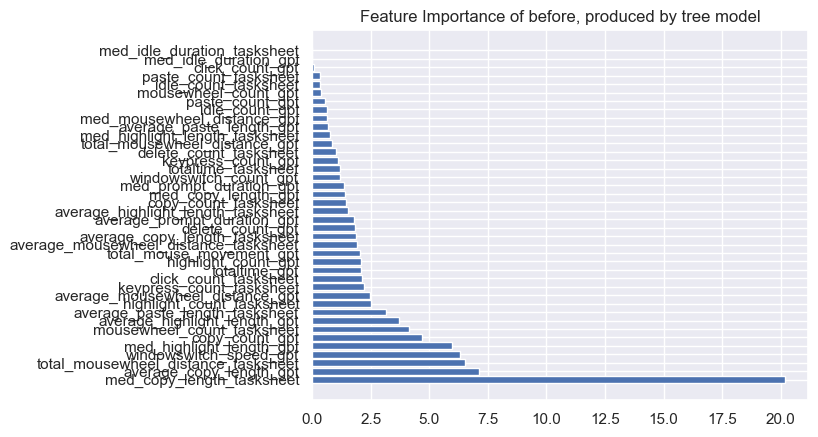

In [30]:
model = fit_with_catboost(norm_before.drop(['score_AI', 'score_alone','score_overreliance'], axis=1), norm_before['score_overreliance'])
# feature importance
plt.figure()
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.barh(range(len(indices)), importances[indices], align='center', color='b')
plt.yticks(range(len(indices)), [norm_before.drop(['score_AI', 'score_alone','score_overreliance'], axis=1).columns[i] for i in indices])
plt.title('Feature Importance of before, produced by tree model')

Text(0.5, 1.0, 'Feature Importance of new, produced by tree model')

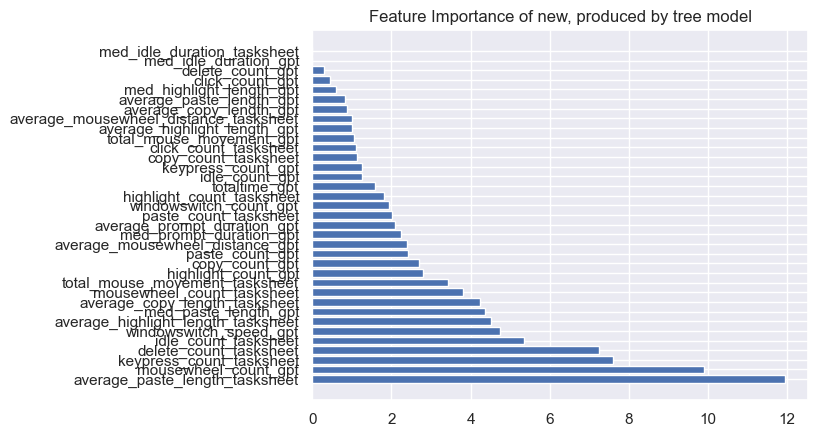

In [31]:
model = fit_with_catboost(norm_new.drop(['score_AI', 'score_alone','score_overreliance'], axis=1), norm_new['score_overreliance'])
# feature importance
plt.figure()
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.barh(range(len(indices)), importances[indices], align='center', color='b')
plt.yticks(range(len(indices)), [norm_new.drop(['score_AI', 'score_alone','score_overreliance'], axis=1).columns[i] for i in indices])
plt.title('Feature Importance of new, produced by tree model')